In [199]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Convolution2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten,Bidirectional,LSTM
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.callbacks import ModelCheckpoint
import sklearn
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
from keras.utils import to_categorical
import pickle


In [200]:
filepath = "eeg_datacombined_all.csv"
df = pd.read_csv(filepath)

In [201]:
df

,Unnamed: 0,alpha_power_1,alpha_power_2,alpha_power_3,alpha_power_4,alpha_power_5,alpha_power_6,alpha_power_7,alpha_power_8,beta_power_1,...,gamma_power_8,theta_power_1,theta_power_2,theta_power_3,theta_power_4,theta_power_5,theta_power_6,theta_power_7,theta_power_8,label
0,0,0.014489,0.025696,2.700534e-02,2.756679e-02,2.887165e-02,3.310573e-02,1.843314e-02,1.012653e-02,0.031924,...,7.071879e-03,0.029616,0.086228,0.087620,0.029069,0.027950,0.032639,0.028988,0.026646,normal
1,1,0.014598,0.018954,2.276555e-02,9.362836e-03,1.336737e-02,1.280834e-02,1.338158e-02,1.097576e-02,0.026225,...,1.348461e-02,0.033468,0.084614,0.077265,0.026162,0.030362,0.030322,0.030347,0.029336,normal
2,2,0.028304,0.030117,3.020398e-02,6.951054e-02,4.330080e-02,3.913054e-02,5.219054e-02,4.058412e-02,0.015347,...,8.246133e-02,0.144785,0.158228,0.159844,0.068772,0.045401,0.138430,0.040979,0.058124,normal
3,3,0.012018,0.011793,1.188131e-02,1.202298e-02,1.201310e-02,1.200658e-02,1.254225e-02,1.234680e-02,0.013490,...,1.407417e-02,0.032745,0.033382,0.033862,0.032730,0.032720,0.032740,0.032649,0.032565,normal
4,4,0.012217,0.012248,1.225911e-02,1.216002e-02,1.216808e-02,1.215890e-02,1.217403e-02,1.226572e-02,0.013572,...,7.168410e-03,0.033145,0.033401,0.033326,0.033285,0.033266,0.033251,0.033260,0.033241,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,146,0.008973,0.008998,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,0.001813,...,4.470000e-10,0.030900,0.030641,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,normal
147,147,0.016366,0.016368,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,0.011735,...,4.470000e-10,0.062969,0.063048,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,normal
148,148,0.053909,0.053978,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,0.026486,...,4.470000e-10,0.081811,0.081759,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,normal
149,149,0.006764,0.006756,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,0.004227,...,4.470000e-10,0.084700,0.084706,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,normal


In [202]:
df['label'].unique()

array(['normal', 'pain', 'yoga'], dtype=object)

In [203]:
del df['Unnamed: 0']

In [204]:

le = LabelEncoder()
le.fit(df['label'])
df['label']=le.transform(df['label'])

In [205]:
df

,alpha_power_1,alpha_power_2,alpha_power_3,alpha_power_4,alpha_power_5,alpha_power_6,alpha_power_7,alpha_power_8,beta_power_1,beta_power_2,...,gamma_power_8,theta_power_1,theta_power_2,theta_power_3,theta_power_4,theta_power_5,theta_power_6,theta_power_7,theta_power_8,label
0,0.014489,0.025696,2.700534e-02,2.756679e-02,2.887165e-02,3.310573e-02,1.843314e-02,1.012653e-02,0.031924,0.025829,...,7.071879e-03,0.029616,0.086228,0.087620,0.029069,0.027950,0.032639,0.028988,0.026646,0
1,0.014598,0.018954,2.276555e-02,9.362836e-03,1.336737e-02,1.280834e-02,1.338158e-02,1.097576e-02,0.026225,0.026678,...,1.348461e-02,0.033468,0.084614,0.077265,0.026162,0.030362,0.030322,0.030347,0.029336,0
2,0.028304,0.030117,3.020398e-02,6.951054e-02,4.330080e-02,3.913054e-02,5.219054e-02,4.058412e-02,0.015347,0.012855,...,8.246133e-02,0.144785,0.158228,0.159844,0.068772,0.045401,0.138430,0.040979,0.058124,0
3,0.012018,0.011793,1.188131e-02,1.202298e-02,1.201310e-02,1.200658e-02,1.254225e-02,1.234680e-02,0.013490,0.012839,...,1.407417e-02,0.032745,0.033382,0.033862,0.032730,0.032720,0.032740,0.032649,0.032565,0
4,0.012217,0.012248,1.225911e-02,1.216002e-02,1.216808e-02,1.215890e-02,1.217403e-02,1.226572e-02,0.013572,0.013645,...,7.168410e-03,0.033145,0.033401,0.033326,0.033285,0.033266,0.033251,0.033260,0.033241,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.008973,0.008998,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,0.001813,0.001788,...,4.470000e-10,0.030900,0.030641,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0
147,0.016366,0.016368,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,0.011735,0.011735,...,4.470000e-10,0.062969,0.063048,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0
148,0.053909,0.053978,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,0.026486,0.026468,...,4.470000e-10,0.081811,0.081759,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0
149,0.006764,0.006756,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,0.004227,0.004229,...,4.470000e-10,0.084700,0.084706,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0


In [206]:
df1=df

In [207]:
df1

,alpha_power_1,alpha_power_2,alpha_power_3,alpha_power_4,alpha_power_5,alpha_power_6,alpha_power_7,alpha_power_8,beta_power_1,beta_power_2,...,gamma_power_8,theta_power_1,theta_power_2,theta_power_3,theta_power_4,theta_power_5,theta_power_6,theta_power_7,theta_power_8,label
0,0.014489,0.025696,2.700534e-02,2.756679e-02,2.887165e-02,3.310573e-02,1.843314e-02,1.012653e-02,0.031924,0.025829,...,7.071879e-03,0.029616,0.086228,0.087620,0.029069,0.027950,0.032639,0.028988,0.026646,0
1,0.014598,0.018954,2.276555e-02,9.362836e-03,1.336737e-02,1.280834e-02,1.338158e-02,1.097576e-02,0.026225,0.026678,...,1.348461e-02,0.033468,0.084614,0.077265,0.026162,0.030362,0.030322,0.030347,0.029336,0
2,0.028304,0.030117,3.020398e-02,6.951054e-02,4.330080e-02,3.913054e-02,5.219054e-02,4.058412e-02,0.015347,0.012855,...,8.246133e-02,0.144785,0.158228,0.159844,0.068772,0.045401,0.138430,0.040979,0.058124,0
3,0.012018,0.011793,1.188131e-02,1.202298e-02,1.201310e-02,1.200658e-02,1.254225e-02,1.234680e-02,0.013490,0.012839,...,1.407417e-02,0.032745,0.033382,0.033862,0.032730,0.032720,0.032740,0.032649,0.032565,0
4,0.012217,0.012248,1.225911e-02,1.216002e-02,1.216808e-02,1.215890e-02,1.217403e-02,1.226572e-02,0.013572,0.013645,...,7.168410e-03,0.033145,0.033401,0.033326,0.033285,0.033266,0.033251,0.033260,0.033241,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.008973,0.008998,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,0.001813,0.001788,...,4.470000e-10,0.030900,0.030641,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0
147,0.016366,0.016368,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,0.011735,0.011735,...,4.470000e-10,0.062969,0.063048,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0
148,0.053909,0.053978,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,0.026486,0.026468,...,4.470000e-10,0.081811,0.081759,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0
149,0.006764,0.006756,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,3.390000e-07,0.004227,0.004229,...,4.470000e-10,0.084700,0.084706,0.000014,0.000014,0.000014,0.000014,0.000014,0.000014,0


In [208]:
scaler = StandardScaler()
#scaler.fit(X)
df1.iloc[0:,:-1] =scaler.fit_transform(df.iloc[0:,:-1]) 

In [209]:
df1

,alpha_power_1,alpha_power_2,alpha_power_3,alpha_power_4,alpha_power_5,alpha_power_6,alpha_power_7,alpha_power_8,beta_power_1,beta_power_2,...,gamma_power_8,theta_power_1,theta_power_2,theta_power_3,theta_power_4,theta_power_5,theta_power_6,theta_power_7,theta_power_8,label
0,-0.536022,-0.094910,-0.250113,-0.257352,-0.360559,-0.378650,-0.436704,-0.538903,-0.397275,-0.035097,...,-0.715276,-0.460390,0.667619,0.842567,-0.212458,-0.281522,-0.359985,-0.282179,-0.290243,0
1,-0.531537,-0.268831,-0.310766,-0.743289,-0.596015,-0.616212,-0.506806,-0.521295,-0.503166,-0.002120,...,-0.670075,-0.367820,0.636808,0.622861,-0.296341,-0.216287,-0.412476,-0.248457,-0.220148,0
2,0.033286,0.019138,-0.204355,0.862296,-0.141431,-0.308135,0.031757,0.092629,-0.705271,-0.538698,...,-0.183889,2.307902,2.042045,2.375031,0.933170,0.190391,2.036507,0.015347,0.529819,0
3,-0.637851,-0.453543,-0.466473,-0.672279,-0.616581,-0.625596,-0.518453,-0.492867,-0.739792,-0.539338,...,-0.665920,-0.385187,-0.341189,-0.298064,-0.106819,-0.152535,-0.357707,-0.191330,-0.136029,0
4,-0.629668,-0.441818,-0.461068,-0.668621,-0.614228,-0.623814,-0.523563,-0.494548,-0.738253,-0.508046,...,-0.714595,-0.375567,-0.340821,-0.309431,-0.090813,-0.137757,-0.346140,-0.176164,-0.118420,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,-0.763351,-0.525646,-0.636438,-0.993212,-0.799013,-0.766118,-0.692501,-0.748868,-0.956756,-0.968282,...,-0.765122,-0.429536,-0.393505,-1.016256,-1.050866,-1.036976,-1.099058,-1.001079,-0.984038,0
147,-0.458671,-0.335542,-0.636438,-0.993212,-0.799013,-0.766118,-0.692501,-0.748868,-0.772393,-0.582166,...,-0.765122,0.341295,0.225115,-1.016256,-1.050866,-1.036976,-1.099058,-1.001079,-0.984038,0
148,1.088465,0.634673,-0.636438,-0.993212,-0.799013,-0.766118,-0.692501,-0.748868,-0.498305,-0.010296,...,-0.765122,0.794192,0.582303,-1.016256,-1.050866,-1.036976,-1.099058,-1.001079,-0.984038,0
149,-0.854364,-0.583495,-0.636438,-0.993212,-0.799013,-0.766118,-0.692501,-0.748868,-0.911902,-0.873549,...,-0.765122,0.863655,0.638552,-1.016256,-1.050866,-1.036976,-1.099058,-1.001079,-0.984038,0


In [210]:
X=df1.drop('label',axis=1)
Y=df1['label']

In [211]:
print(X.shape,Y.shape)

(151, 32) (151,)


In [212]:
nb_class=3
Y = to_categorical(Y, nb_class)

In [213]:
print(X.shape,Y.shape)

(151, 32) (151, 3)


In [214]:
normalized_x = np.expand_dims(X,axis=2)
print(normalized_x.shape)

(151, 32, 1)


In [215]:
normalized_y = Y

In [216]:
print(normalized_x.shape)
print(normalized_y.shape)


(151, 32, 1)
(151, 3)


In [217]:
trainx, testx, trainy, testy = train_test_split(normalized_x,normalized_y, test_size=0.2, random_state=100)

In [218]:
print(trainx.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)

(120, 32, 1)
(120, 3)
(31, 32, 1)
(31, 3)


In [219]:
nb_timesteps=trainx.shape[1]
nb_features=trainx.shape[2]

## EEGNET

In [222]:
eegnet_model = Sequential()
eegnet_model.add(Convolution2D(filters=32, kernel_size=(3,1), activation='relu', input_shape=(nb_timesteps, nb_features, 1)))
eegnet_model.add(MaxPooling2D(pool_size=1))
eegnet_model.add(Flatten())
eegnet_model.add(Dropout(0.2))
eegnet_model.add(Dense(100, activation='relu'))
eegnet_model.add(Dense(nb_class,activation="softmax"))
eegnet_model.summary()
eegnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
eegnet_model.fit(trainx.reshape(-1, nb_timesteps, nb_features, 1), trainy, epochs=25, validation_data=(testx.reshape(-1, nb_timesteps, nb_features, 1), testy), batch_size=64
        )


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 1, 32)         128       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 1, 32)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 960)               0         
                                                                 
 dropout_5 (Dropout)         (None, 960)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               96100     
                                                                 
 dense_9 (Dense)             (None, 3)                 303       
                                                      

In [223]:
eegnet_model.save('eeg_2dcnn_model.h5')


In [224]:
pred = eegnet_model.predict(testx.reshape(-1, nb_timesteps, nb_features, 1))
pred = np.argmax(pred,axis=1) 
from sklearn import metrics
y_compare = np.argmax(testy,axis=1) 
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score))


1/1 [==============================] - 0s 71ms/step
Accuracy score: 0.8709677419354839


In [225]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_compare, pred)
cnf_matrix

array([[ 7,  1,  0],
       [ 0, 12,  0],
       [ 1,  2,  8]], dtype=int64)

In [226]:
# cm_normalized = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
# products=df['label'].unique()
# print('Normalized confusion matrix')
# print(cm_normalized)
# plt.figure()
# plot_confusion_matrix(cm_normalized, )

# plt.show()

In [227]:
cnf_matrix = confusion_matrix(y_compare, pred)
cnf_matrix
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [228]:
TPR

array([0.875     , 1.        , 0.72727273])

In [229]:
TNR

array([0.95652174, 0.84210526, 1.        ])

In [230]:
ACC.mean()

0.9139784946236559

In [231]:
# print('''
#    class sensitivity specificity
# 0   0     1.00        0.95
# 1   1     0.88        0.96
# 2   2     0.92        1.00

# ACC :
# ''')

1/1 [==============================] - 0s 17ms/step


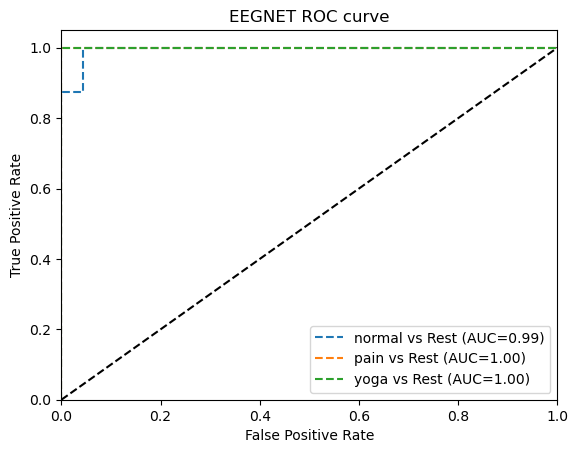

In [232]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', 
                            cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    # roc curve for classes
    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc = dict()
    classes=['normal','pain','yoga']
    n_class = 3

    for i in range(3):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y[:,i], pred[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        # plotting    
        plt.plot(fpr[i], tpr[i], linestyle='--', 
                 label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

    #plt.figure()
    #plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('EEGNET ROC curve')
    plt.legend(loc="lower right")
    plt.show()
pred = eegnet_model.predict(testx.reshape(-1, nb_timesteps, nb_features, 1))
plot_roc(pred,testy)

## SVM

In [233]:
X

,alpha_power_1,alpha_power_2,alpha_power_3,alpha_power_4,alpha_power_5,alpha_power_6,alpha_power_7,alpha_power_8,beta_power_1,beta_power_2,...,gamma_power_7,gamma_power_8,theta_power_1,theta_power_2,theta_power_3,theta_power_4,theta_power_5,theta_power_6,theta_power_7,theta_power_8
0,-0.536022,-0.094910,-0.250113,-0.257352,-0.360559,-0.378650,-0.436704,-0.538903,-0.397275,-0.035097,...,0.267905,-0.715276,-0.460390,0.667619,0.842567,-0.212458,-0.281522,-0.359985,-0.282179,-0.290243
1,-0.531537,-0.268831,-0.310766,-0.743289,-0.596015,-0.616212,-0.506806,-0.521295,-0.503166,-0.002120,...,-0.434145,-0.670075,-0.367820,0.636808,0.622861,-0.296341,-0.216287,-0.412476,-0.248457,-0.220148
2,0.033286,0.019138,-0.204355,0.862296,-0.141431,-0.308135,0.031757,0.092629,-0.705271,-0.538698,...,0.435666,-0.183889,2.307902,2.042045,2.375031,0.933170,0.190391,2.036507,0.015347,0.529819
3,-0.637851,-0.453543,-0.466473,-0.672279,-0.616581,-0.625596,-0.518453,-0.492867,-0.739792,-0.539338,...,-0.706759,-0.665920,-0.385187,-0.341189,-0.298064,-0.106819,-0.152535,-0.357707,-0.191330,-0.136029
4,-0.629668,-0.441818,-0.461068,-0.668621,-0.614228,-0.623814,-0.523563,-0.494548,-0.738253,-0.508046,...,-0.784254,-0.714595,-0.375567,-0.340821,-0.309431,-0.090813,-0.137757,-0.346140,-0.176164,-0.118420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,-0.763351,-0.525646,-0.636438,-0.993212,-0.799013,-0.766118,-0.692501,-0.748868,-0.956756,-0.968282,...,-0.830215,-0.765122,-0.429536,-0.393505,-1.016256,-1.050866,-1.036976,-1.099058,-1.001079,-0.984038
147,-0.458671,-0.335542,-0.636438,-0.993212,-0.799013,-0.766118,-0.692501,-0.748868,-0.772393,-0.582166,...,-0.830215,-0.765122,0.341295,0.225115,-1.016256,-1.050866,-1.036976,-1.099058,-1.001079,-0.984038
148,1.088465,0.634673,-0.636438,-0.993212,-0.799013,-0.766118,-0.692501,-0.748868,-0.498305,-0.010296,...,-0.830215,-0.765122,0.794192,0.582303,-1.016256,-1.050866,-1.036976,-1.099058,-1.001079,-0.984038
149,-0.854364,-0.583495,-0.636438,-0.993212,-0.799013,-0.766118,-0.692501,-0.748868,-0.911902,-0.873549,...,-0.830215,-0.765122,0.863655,0.638552,-1.016256,-1.050866,-1.036976,-1.099058,-1.001079,-0.984038


In [234]:
Y1=df1['label']
Y1

0      0
1      0
2      0
3      0
4      0
      ..
146    0
147    0
148    0
149    0
150    0
Name: label, Length: 151, dtype: int32

In [235]:
trainx1, testx1, trainy1, testy1 = train_test_split(X,Y1, test_size=0.25, random_state=100)

In [236]:
testx1

,alpha_power_1,alpha_power_2,alpha_power_3,alpha_power_4,alpha_power_5,alpha_power_6,alpha_power_7,alpha_power_8,beta_power_1,beta_power_2,...,gamma_power_7,gamma_power_8,theta_power_1,theta_power_2,theta_power_3,theta_power_4,theta_power_5,theta_power_6,theta_power_7,theta_power_8
128,-0.384856,-0.364368,0.424603,0.920467,0.544697,-0.057443,-0.654675,-0.714482,-0.625781,-0.297924,...,-0.813040,-0.728855,-0.823663,-0.744263,-0.234954,-0.057989,-0.286885,-0.703242,-0.951442,-0.960354
11,-0.969356,-0.679625,-0.578867,-0.894015,-0.752206,-0.718640,-0.650502,-0.538494,-0.836354,-0.832391,...,-0.521005,0.097905,-1.011946,-0.748718,-0.748412,-0.693899,-0.738630,-0.876602,-0.740601,-0.168839
118,-0.276105,2.642495,1.082831,0.697376,2.365858,1.309843,1.778668,2.725031,0.078937,2.412600,...,-0.134408,-0.482714,-0.617640,1.281545,0.886209,0.451526,2.997054,2.137135,2.469026,3.044310
15,-0.690909,-0.509535,-0.496799,-0.733617,-0.640585,-0.685754,-0.562775,-0.495656,-0.724420,-0.603482,...,-0.627635,-0.369527,-0.510511,-0.438848,-0.446442,-0.286005,-0.325311,-0.676526,-0.340588,-0.275024
123,-0.742053,-0.641604,0.114890,-0.574823,0.100633,-0.495151,-0.634683,-0.725467,-0.770481,-0.773248,...,-0.801479,-0.738377,-0.917923,-0.875859,-0.127527,-0.649911,-0.018549,-0.796586,-0.891918,-0.954485
136,-0.637829,-0.597112,-0.530032,-0.537059,-0.056661,-0.385245,-0.456668,-0.553493,-0.588861,-0.592814,...,1.465592,2.775089,-0.245608,-0.657426,-0.702336,-0.318940,-0.081953,-0.411713,-0.508171,-0.712472
32,-0.770254,-0.418918,-0.466775,-0.915943,-0.547333,-0.610267,-0.517998,-0.542353,-0.543425,0.180786,...,-0.706477,-0.016884,-0.800770,-0.531779,-0.661381,-0.928768,-0.506946,-0.688166,0.229045,-0.591141
1,-0.531537,-0.268831,-0.310766,-0.743289,-0.596015,-0.616212,-0.506806,-0.521295,-0.503166,-0.002120,...,-0.434145,-0.670075,-0.367820,0.636808,0.622861,-0.296341,-0.216287,-0.412476,-0.248457,-0.220148
116,2.625427,1.052295,0.008919,0.797895,1.375509,1.217339,1.427087,2.078423,2.352979,0.823015,...,-0.071234,-0.156454,1.382900,0.064123,-0.260263,0.444113,1.643323,1.741121,2.109686,1.801370
45,-0.476258,-0.460665,-0.471677,0.342665,-0.612423,-0.520425,-0.520900,-0.506978,-0.469522,-0.540213,...,-0.728528,-0.678061,-0.396196,-0.384731,-0.357891,0.770737,-0.181116,-0.352375,-0.195402,-0.177061


In [237]:
svm_model = svm.SVC(kernel='linear',C=1)
y_pred1=svm_model.fit(trainx1, trainy1)

# make predictions on the test data
y_pred = svm_model.predict(testx1)

acc = accuracy_score(testy1, y_pred)
print("Accuracy:", acc)


Accuracy: 0.8947368421052632


In [238]:
testy

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [239]:
pred

array([[1.46155304e-03, 1.42619321e-02, 9.84276533e-01],
       [4.69665468e-01, 5.21656394e-01, 8.67824350e-03],
       [9.59986210e-06, 2.60903663e-03, 9.97381389e-01],
       [5.51729798e-01, 4.24259573e-01, 2.40106359e-02],
       [2.97371857e-03, 6.62934333e-02, 9.30732846e-01],
       [8.07781331e-03, 9.88099337e-01, 3.82272201e-03],
       [1.30253902e-03, 9.93784189e-01, 4.91320249e-03],
       [9.12451565e-01, 8.25915709e-02, 4.95688850e-03],
       [1.61960579e-05, 1.15442490e-04, 9.99868393e-01],
       [5.16356528e-01, 2.10499167e-02, 4.62593555e-01],
       [3.05346012e-01, 5.73413253e-01, 1.21240675e-01],
       [6.52172093e-05, 9.34907235e-03, 9.90585685e-01],
       [2.38195360e-01, 6.87141001e-01, 7.46635646e-02],
       [2.61155874e-01, 7.03012824e-01, 3.58312950e-02],
       [9.62171972e-01, 3.65972295e-02, 1.23080797e-03],
       [9.99739408e-01, 2.29441590e-04, 3.11709373e-05],
       [1.23578298e-03, 9.93893862e-01, 4.87042870e-03],
       [9.36262310e-04, 9.92290

In [240]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


In [241]:
cnf_matrix = confusion_matrix(testy1, y_pred)
cnf_matrix

array([[12,  0,  0],
       [ 0, 12,  0],
       [ 2,  2, 10]], dtype=int64)

In [242]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [243]:
ACC.mean()

0.9298245614035087

In [244]:
TPR

array([1.        , 1.        , 0.71428571])

In [245]:
TNR

array([0.92307692, 0.92307692, 1.        ])

In [246]:
# print('''
#    class sensitivity specificity
# 0   0     0.94        0.88
# 1   1     0.90        0.97
# 2   2     0.87        1.00

# ACC :
# ''')

In [247]:
# Saving model to disk
pickle.dump(svm_model, open('svm_model.pkl','wb'))


In [248]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# pr,tpr,thresholds=roc_curve(testy1, svm_model.predict_proba(testx1)[:,1])

In [249]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
RF=OneVsRestClassifier(svm.SVC(probability=True, class_weight={0:3}))
RF.fit(trainx1,trainy1)
y_pred =RF.predict(testx1)
pred_prob = RF.predict_proba(testx1)


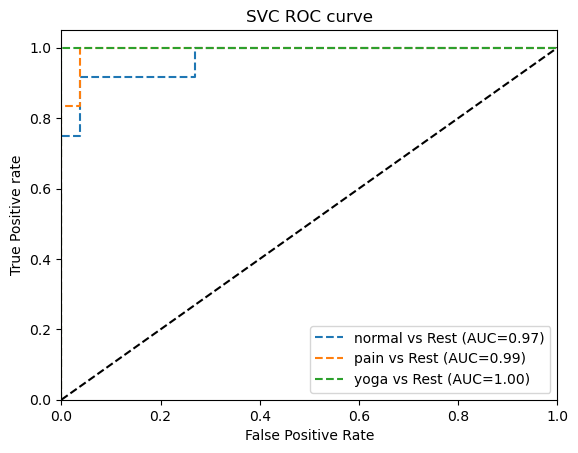

In [250]:
from sklearn.preprocessing import label_binarize
#binarize the y_values

y_test_binarized=label_binarize(testy1,classes=np.unique(testy1))

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()
classes=['normal','pain','yoga']
n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

plt.plot([0,1],[0,1],'k--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('SVC ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

## BILSTM

In [251]:
X_bilstm = np.expand_dims(X,axis=1)

In [252]:
print(X_bilstm.shape)
print(Y.shape)

(151, 1, 32)
(151, 3)


In [253]:
xtrain, xtest, ytrain, ytest = train_test_split(X_bilstm,Y, test_size=0.2, random_state=100)

In [257]:
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(100, input_shape=(1,nb_timesteps))))
bilstm_model.add(Dropout(0.2))
bilstm_model.add(Dense(nb_class,activation="softmax"))
bilstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
bilstm_model.fit(xtrain, ytrain, epochs=50, batch_size=64, validation_data=(xtest, ytest))

bilstm_model.summary()

Epoch 1/50
2/2 [==============================] - 5s 950ms/step - loss: 1.0928 - accuracy: 0.4250 - val_loss: 1.0451 - val_accuracy: 0.4839
Epoch 2/50
2/2 [==============================] - 0s 35ms/step - loss: 1.0414 - accuracy: 0.5250 - val_loss: 1.0078 - val_accuracy: 0.6129
Epoch 3/50
2/2 [==============================] - 0s 36ms/step - loss: 1.0005 - accuracy: 0.6333 - val_loss: 0.9738 - val_accuracy: 0.6774
Epoch 4/50
2/2 [==============================] - 0s 38ms/step - loss: 0.9529 - accuracy: 0.7250 - val_loss: 0.9447 - val_accuracy: 0.6774
Epoch 5/50
2/2 [==============================] - 0s 35ms/step - loss: 0.9195 - accuracy: 0.7333 - val_loss: 0.9181 - val_accuracy: 0.6452
Epoch 6/50
2/2 [==============================] - 0s 36ms/step - loss: 0.8790 - accuracy: 0.7417 - val_loss: 0.8945 - val_accuracy: 0.6452
Epoch 7/50
2/2 [==============================] - 0s 35ms/step - loss: 0.8505 - accuracy: 0.7750 - val_loss: 0.8730 - val_accuracy: 0.6452
Epoch 8/50
2/2 [==========

In [258]:
bilstm_model.save('bilstm_model.h5')
bilstm_model =tf.keras.models.load_model('bilstm_model.h5')

In [259]:
pred = bilstm_model.predict(xtest)
pred = np.argmax(pred,axis=1) 
from sklearn import metrics
y_compare = np.argmax(ytest,axis=1) 
score = metrics.accuracy_score(y_compare, pred)
print("Accuracy score: {}".format(score))


1/1 [==============================] - 1s 816ms/step
Accuracy score: 0.8387096774193549


In [260]:
cnf_matrix = confusion_matrix(y_compare, pred)
cnf_matrix


array([[ 8,  0,  0],
       [ 2, 10,  0],
       [ 2,  1,  8]], dtype=int64)

1/1 [==============================] - 0s 18ms/step


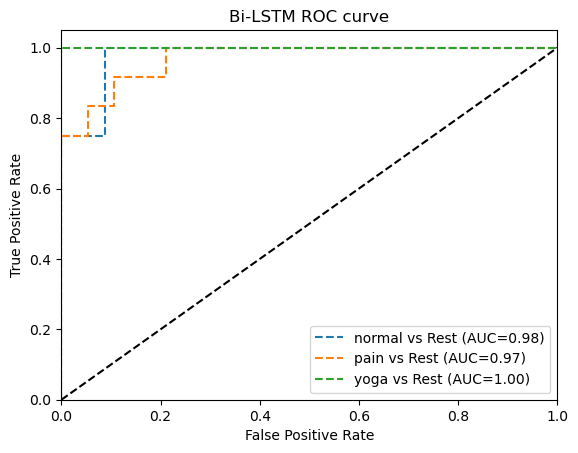

In [261]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', 
                            cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    # roc curve for classes
    fpr = {}
    tpr = {}
    thresh ={}
    roc_auc = dict()
    classes=['normal','pain','yoga']
    n_class = 3

    for i in range(3):    
        fpr[i], tpr[i], thresh[i] = roc_curve(y[:,i], pred[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])

        # plotting    
        plt.plot(fpr[i], tpr[i], linestyle='--', 
                 label='%s vs Rest (AUC=%0.2f)'%(classes[i],roc_auc[i]))

    #plt.figure()
    #plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Bi-LSTM ROC curve')
    plt.legend(loc="lower right")
    plt.show()
pred = bilstm_model.predict(xtest)
plot_roc(pred,ytest)

In [262]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [263]:
ACC.mean()

0.8924731182795699

In [264]:
TPR

array([1.        , 0.83333333, 0.72727273])

In [265]:
TNR

array([0.82608696, 0.94736842, 1.        ])

In [186]:
# print('''
#    class sensitivity specificity
# 0   0     0.91        0.90
# 1   1     1.00        0.92
# 2   2     0.76        1.00

# ''')

Text(0, 0.5, 'Accuracy (%)')

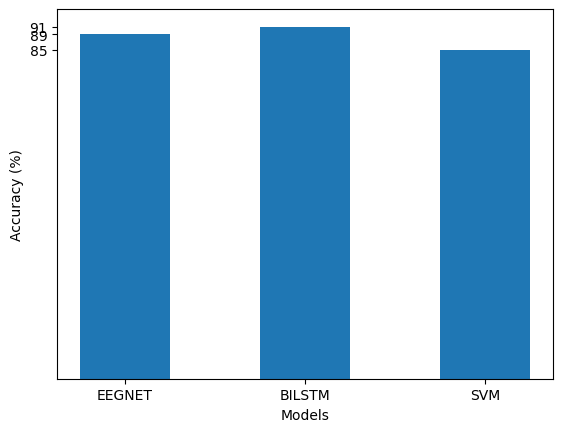

In [35]:
import numpy as np                                                               
import matplotlib.pyplot as plt

top=[('EEGNET',89),('BILSTM',91),('SVM',85)]

labels, ys = zip(*top)
xs = np.arange(len(labels)) 
width = 0.5

plt.bar(xs, ys, width, align='center')

plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)

plt.xlabel("Models")
plt.ylabel("Accuracy (%)")

## MAKING PREDICTIONS

In [266]:
df.iloc[50].values.tolist()


[0.8320995545348333,
 -0.47080345571418525,
 -0.25723026554947614,
 0.49777012760032474,
 -0.24331045384027447,
 -0.3778501790780142,
 -0.5358951106359641,
 0.7208039877585883,
 1.0225802563550601,
 -0.507927785009699,
 1.7833071470244066,
 0.5262943006517369,
 0.33888511628405793,
 2.067510308636379,
 -0.7483314183732611,
 0.06883941294799868,
 0.618528395411995,
 -0.6210595139996998,
 1.9574975081290746,
 -0.1650333193636075,
 1.5789162273707278,
 4.173216268182892,
 -0.6666741006020445,
 -0.10966141583619551,
 0.5404036445064404,
 -0.38975182952131376,
 -0.37841249956580025,
 1.2773486515289365,
 0.28627584555322605,
 -0.3705458882160192,
 -0.30129732998500147,
 0.7547242009618237,
 2.0]

In [276]:
df1.iloc[123,0:33].values

array([-0.7420535 , -0.64160426,  0.11488984, -0.57482311,  0.10063297,
       -0.49515127, -0.63468295, -0.72546736, -0.77048133, -0.77324781,
        0.68828558, -0.63675991,  0.54457262, -0.43558039, -0.98102208,
       -1.1203226 , -0.80952025, -0.61537837, -0.45936553, -0.64433602,
       -0.67546229, -0.78517714, -0.80147889, -0.73837675, -0.91792307,
       -0.87585918, -0.12752718, -0.64991103, -0.01854856, -0.7965859 ,
       -0.8919176 , -0.95448459,  2.        ])

In [277]:
result=['normal','pain','yoga']

## sample input

In [278]:
test_data = np.array([df1.iloc[123,0:32].values.tolist()])
test_data

array([[-0.7420535 , -0.64160426,  0.11488984, -0.57482311,  0.10063297,
        -0.49515127, -0.63468295, -0.72546736, -0.77048133, -0.77324781,
         0.68828558, -0.63675991,  0.54457262, -0.43558039, -0.98102208,
        -1.1203226 , -0.80952025, -0.61537837, -0.45936553, -0.64433602,
        -0.67546229, -0.78517714, -0.80147889, -0.73837675, -0.91792307,
        -0.87585918, -0.12752718, -0.64991103, -0.01854856, -0.7965859 ,
        -0.8919176 , -0.95448459]])

## EEGNET PREDICTION

In [279]:
eegnet_model =tf.keras.models.load_model('eeg_2dcnn_model.h5')
o=eegnet_model.predict(test_data.reshape(-1,32,1,1), batch_size=1)
print(o)
print(len(o[0]))
print(o.argmax())
print(result[int(o.argmax())])

1/1 [==============================] - 0s 55ms/step
[[0.00297372 0.06629337 0.9307329 ]]
3
2
yoga


## SVM PREDICTION

In [280]:
# Loading model to compare the results
svm_model = pickle.load(open('svm_model.pkl','rb'))
o=svm_model.predict(test_data)
print(o)
print(result[o[0]])


[2]
yoga


C:\Users\PRAMILA\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## BILSTM PREDICTION

In [281]:
bilstm_model =tf.keras.models.load_model('bilstm_model.h5')
o=bilstm_model.predict(test_data.reshape(-1,1,32), batch_size=1)

print(o)
print(len(o[0]))
print(o.argmax())
print(result[int(o.argmax())])

1/1 [==============================] - 1s 1s/step
[[0.175825  0.3354735 0.4887015]]
3
2
yoga
